In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm


# x_code is x_phys/dt in 2 differente ways
# 1. when dt=1, m=m_phys -----> x_normcode=x_physical/1
# 2. when dt=0.1=m, m_phys=1 -----> x_code=x_physical/dt ----->x_code*dt=x_physical (for theoretical or code calculations)
# also x_code=x_physical/dt=x_normcode/dt this is 2. with 1.

# As de distance is defined in terms of dt (x=x_fisica/dt)
# and m=mfisica*dt is taken as the efective lattice spacing if dt=1 interchange with the mfisica so that --->dt=m<---- (effective lattice spacing) and mfisica=1
# As in our code dt_code=1, x needs to be rescaled so that x = x2EV/dt_lattice, same applies for the anallytical solution
# x_code=x_fisico/1 ----> x_paper=x_fisico/dt_lattice=x_code/dt_lattice

"""
#MetropolisHasting
class MetropolisHasting:

  accrate=0
  t_min=
  t_plu=
  i=

  def __init__ (self,Nt,path,h,m,w):
    self.s_new=s_new
    self.s_old=s_old

    self.xpath_new=xpath_new
    randm=np.array(2*Nt)
    Index=np.array(Nt)

path=np.array(1)
"""

"""
# Quantum Harmonic Oscillator Lagrangian
def lagrangian_qho(x, m, omega):
    kinetic = 0.5 * m * (np.diff(x)/dt)**2
    potential = 0.5 * m * omega**2 * x**2
    return kinetic - potential

phi=np.zeros(N) #Init cont field=number of lattice points
# QFT Scalar Field Theory Lagrangian
def lagrangian_qft(phi, m, lambda_, lattice_spacing):
    kinetic = 0.5 * np.sum((np.roll(phi, 1, axis=0) - phi)**2)
    mass_term = 0.5 * m**2 * np.sum(phi**2)
    interaction = lambda_ / 4! * np.sum(phi**4)
    return kinetic - mass_term - interaction
"""
def ExpectValX24(Nt,w,m):
  R=1+(w**2)/2-w*(1+(w**2)/4)**(1/2)
  alfa=(1+R**Nt)/(1-R**Nt)
  x2EV=(1/(2*m*w*(1+(w**2)/4)**(1/2)))*alfa
  x4EV=3*x2EV**2
  #print(x4EV)
  #x4EV2=(3/(2*m*w)**2*(1+(w**2)/4))*alfa**2
  #print(x4EV2)

  # 2. when dt=0.1=m, m_phys=1 -----> x_theo=x_physical/dt ----->x_theo*dt=x_physical (for theoretical or code calculations)

  return x2EV*w**2, x4EV*w**4

####### MonteCarlo Estimate Calculation #######
def E_MCX2(x):
    Emc=np.sum(x**2)/len(x)
    return Emc

def E_MCX1(x):
    Emc=np.sum(x)/len(x)
    return Emc

def E_MCX3(x):
    Emc=np.sum(x**3)/len(x)
    return Emc

def E_MCX4(x):
    Emc=np.sum(x**4)/len(x)
    return Emc

#MetropolisHastings
def MetropolisHS(Nt,path,h,m,w): #path (array) with Nt sites

  accrate=0
  #t=0
  #tmin=0
  #tplu=0
  #i=
  #s_new=0#s_new
  #s_old=(1/2)*m*(path[tplu]-path[t])**2 + (1/2)*m*(path[t]-path[tmin])**2 + (1/2)*m*w*(path[t])**2 #current action value

  #xpath_new=xpath_new
  randm=np.zeros(2*Nt)
  index=np.zeros(Nt)
  #path=np.array(1)
  dt=np.zeros(Nt)
  x2EV=np.zeros(Nt)
  x4EV=np.zeros(Nt)
  Emc=np.zeros(Nt)

  #specify the random site visiting order
  for i in range(0,Nt-1,1):
    index[i]=int(math.floor(Nt*np.random.rand())) #an array of random "times", [0,Nt]
  #index=math.floor(Nt*np.random.rand(Nt)) #an array of random "times", [0,Nt]

  #produces an array of uniform [0,1] random numbers
  #for i in range(0,2*Nt,1):
  #  randm[i]=np.random.rand()
  randm=np.random.rand(2*Nt)

  for i in range(0,Nt-1,1): #update the path
    #dt=1
    t=int(index[i]) # a site to visit, randomly selected
    #print(t)
    tmin=(t+(Nt-1)) % Nt #periodic conditions
    tplu=(t+(1)) % Nt
    #dt[t]=tplu-tmin
    #print(dt[t])
    xpath_new=path[t]+h*(randm[i]-0.5) #propose new value for path[t]
    #dt[t]=xpath_new-path[t]??
    #m=m*dt
    #w=w*dt

    s_old= (1/2)*m*(path[tplu]-path[t])**2 + (1/2)*m*(path[t]-path[tmin])**2 + (1/2)*m*w**2*(path[t])**2 #current action value
    s_new= (1/2)*m*(path[tplu]-xpath_new)**2 + (1/2)*m*(xpath_new-path[tmin])**2 + (1/2)*m*w**2*(xpath_new)**2 #current action value

    #1 Metropolis-Hastings
    #If the action is lowered by the proposed change, e−snew +sold > 1, then the change is mad
    #If snew > sold, the use of the random number, uniformly distributed in the interval [0, 1[, ensures that the proposal is accepted
    #with the probability e−snew +sold .
    if (randm[Nt+i] < np.exp(-s_new+s_old)): #exp-s_n+s_o is the ratio of probabilities
    #if (s_new > s_old) and ( np.exp(-s_new+s_old) <= randm[Nt+i] ): #Landau, Paez
      #print("xpath_new-path[t]")
      path[t]=xpath_new
      #dt[t]=xpath_new-path[t]???
      accrate=accrate +1/Nt #adjustment of acceptance rate? update accordingly



    """
    #2 Metropolis is a particular case of M-H
    ds=s_new-s_old

    F=−kB​Tnp.log(np.exp(-s_new+s_old)) #-np.log(Prob xnew/Prob xold)
    ds=-dF/dT #or
    ds=-np.log(Prob xnew/Prob xold)

    if d_S<0:
    phi.append(phi_p)

    elif d_S>0:
    x = np.random.random()

      if x<expint(phi_p,mu,c)/expint(phi[-1],mu,c):
        phi.append(phi_p)

      elif x>expint(phi_p,mu,c)/expint(phi_0,mu,c):
        pass
    """

    x2EV[i], x4EV[i]=1,2 #ExpectValX24(Nt,w,m)
  idrate=0.8
  h=h*accrate/(idrate) #adjust target interval for future use #step size h is adjusted based on the acceptance rate

  ####### MonteCarlo Estimate Calculation #######
  #print(path)
  Emc2=E_MCX2(path)
  Emc1=E_MCX1(path)
  Emc3=E_MCX3(path)
  Emc4=E_MCX4(path)
  return path,h, x2EV, x4EV,dt, index, Emc1, Emc2, Emc3, Emc4

#we run a series of simulations, each with a smaller efective lattice spacing (that is, a smaller value of
#~m) and a greater value of Nt than the previous, such that the product Nt ~m is fxed.
#reduccion de varianza?

"""
#Adjustment of Acceptance Rate:
#accrate keeps track of the acceptance rate.
#It is updated by adding 1/N
 (where N
 is the total number of iterations) when an acceptance occurs.
#Final Step:
#The step size h is adjusted based on the acceptance rate for future iterations.
"""

'\n#Adjustment of Acceptance Rate:\n#accrate keeps track of the acceptance rate.\n#It is updated by adding 1/N\n (where N\n is the total number of iterations) when an acceptance occurs.\n#Final Step:\n#The step size h is adjusted based on the acceptance rate for future iterations.\n'

In [3]:
###### two-point function #######


def twopf(path,deltat):

  Nt=len(path)
  G=np.zeros(len(deltat))
  for k in range(0,len(deltat)-1,1):
    sum=0
    print("deltatk",deltat[k])
    for i in range(0,Nt-1,1):
      for j in range(0,Nt-1,1):
        #print(i,j)
        #if ((j-i)%Nt-dt[i]<=0.01):
        if ((j-i)%Nt==deltat[k]):
          #print("esta",i,j)
          sum=sum+(path[i])*(path[j])
    G[k]=sum/Nt
    #print(G[i])
  return G

#Calculate the correlation function
def correlation_function(path, deltat):#correlation_function(path, deltat):
  N_tau=len(path)
  G=np.zeros(len(deltat))
  for tau in range(N_tau):
      for j in range(0,len(deltat),1): #j is Delta_tau
          #print(tau,deltat[j])
          # Periodic boundary conditions
          tau_prime = (tau + deltat[j]) % N_tau
          G[j] += (path[tau]) * (path[tau_prime])/N_tau
  return G

"""
#two-point function
def twopf(path,dt):
  sum=0
  G=np.zeros(Nt)
  for i in range(0,Nt-1,1):
    for j in range(0,Nt-1,1):
      if ((j-i)%Nt==dt[i]):
        sum=sum+path[i]*path[j]
    G[i]=(1/Nt)*sum
    #print(G[i])
  return G
"""

def twopf2A(path,t,dt):
  e=1#correlation time
  T=t[-1]#Final tim
  A=2
  G=A*np.exp(-dt/e) + A*np.exp(-(T-dt)/e)
  return G

def EffectiveMass(path,deltat):
  einv=(1/2)*np.log(correlation_function(path,(deltat-1))/correlation_function(path,(deltat+1)))
  for e in range(0,len(einv),1):
    if np.isnan(einv[e]):
      einv[e]=0
  return einv

##Main to perform many statistical measurements through generating paths


Trial run for Thermalization

100%|██████████| 500/500 [00:56<00:00,  8.92it/s]


$\langle \hat{X}^2 \rangle$ average 46.08013376292371


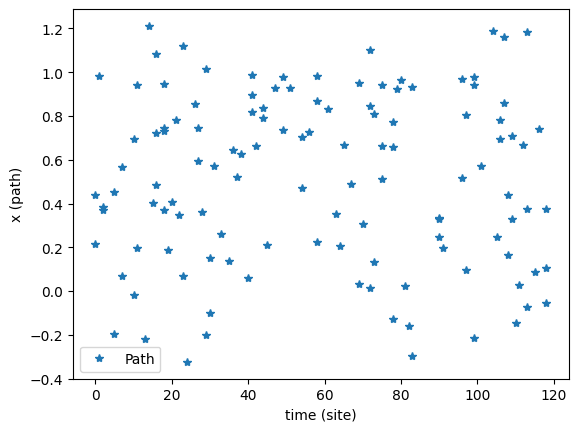

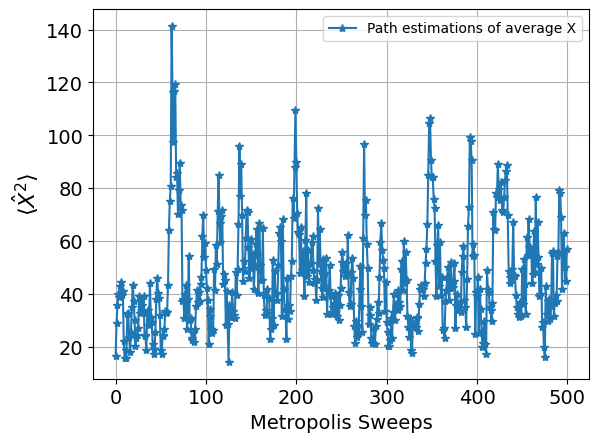

In [ ]:
#######  Main to perform many statistical measurements through generating paths ###############
# Trial run for Thermalization

#Simulation parameters
LatticeSpacing=0.1

dtt=LatticeSpacing
m=LatticeSpacing
w=LatticeSpacing
Nt=120#1200
Nsweeps=500 #1000 #1000 or 10000
h=0.8 #free parameter accounting for acceptance rate


path=np.zeros(Nt) #cold start #initialize path ("seed")
path=np.random.rand(Nt) #hot start
#observables and correlations  statistically measured from many configurations
deltat=np.arange(1,100,1) # independet variable of the correlation measurements
EmcX1=np.zeros(Nsweeps)
EmcX2=np.zeros(Nsweeps)
EmcX3=np.zeros(Nsweeps)
EmcX4=np.zeros(Nsweeps)
G=np.zeros((Nsweeps, len(deltat)))
G2=np.zeros((Nsweeps, len(deltat)))
einv=np.zeros((Nsweeps, len(deltat)))

# to graph the path
path,h, x2EV, x4EV,dt, index, EmcX1[0], EmcX2[0], EmcX3[0], EmcX4[0] = MetropolisHS(Nt,path,h,m,w)
#plt.plot(Nt,x2EV)
plt.figure(0)
plt.plot(index,path,"*",label="Path")
plt.ylabel("x (path)")
plt.xlabel("time (site)")
#plt.plot(index,h,label="h")
plt.legend()


#remember that in our code dt=1 and m_physical=0.1
#so to get to dt=0.1 and m_physical=1 (mathematically equal) we do X_code=X_physical/dt ---> X_code*dt=X_physical :
EmcX2=EmcX2*dtt


# graph EV of x**2
######### Expected values (measurements) ########
cntr=np.zeros(Nsweeps)
for cnt in range(0,len(EmcX2),1):
  cntr[cnt]=cnt
for sweep in tqdm(range(0,Nsweeps,1)): #also one sweep is one montecarlo step per site
  #print(sweep)
  for dis in range(0,100-1,1):
    path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
  path,h, x2EV, x4EV,dt, index, EmcX1[sweep], EmcX2[sweep], EmcX3[sweep], EmcX4[sweep] =MetropolisHS(Nt,path,h,m,w)

plt.figure(10)
#cntr=index??
plt.plot(cntr,EmcX2,"*-",label="Path estimations of average X")
plt.ylabel(r"$\langle \hat{X}^2 \rangle$",fontsize=16)
plt.tick_params(axis="both", which="major", labelsize=14)
plt.tick_params(axis="both", which="minor", labelsize=14)
plt.xlabel("Metropolis Sweeps",fontsize=14)
#plt.plot(index,h,label="h")
plt.grid()
plt.legend()
print(r"$\langle \hat{X}^2 \rangle$ average", np.sum(EmcX2)/len(EmcX2))
plt.savefig("Thermalization.eps")

##Perform many statistical measurements through generating paths

In [4]:
#######  Main to perform many statistical measurements through generating paths ###############

#Simulation parameters
LatticeSpacing=0.1
Nt=1200
Nsweeps=1000 #1000 or 10000
h=0.8 #free parameter accounting for acceptance rate

dtt=LatticeSpacing # Desired Lattice Spacing
m=LatticeSpacing
w=LatticeSpacing

### graph two point correlation and effective mass ####
def AvObs(G): #average observables from different random configurations
  deltat=np.arange(1,100,1)
  AvG=np.zeros(len(deltat))
  AvGSD=np.zeros(len(deltat))
  for ii in range(0,len(deltat)-1,1):
    avSum=0
    avSumSD=0
    #print("deltatii",deltat[ii])
    for jj in range(0,Nsweeps,1):
      avSum=avSum+G[jj][ii]
      #print(G[jj][ii])
    AvG[ii]=avSum/Nsweeps
    for jj in range(0,Nsweeps,1):
      avSumSD=avSumSD+(G[jj][ii]-AvG[ii])**2
      #print(G[jj][ii])
    AvGSD[ii]=np.sqrt(avSumSD/(Nsweeps-1))
  #print(AvG,type(AvG))
  return AvG,AvGSD

def JackknifeAv(O,B):

  if (O.ndim==2): #if the numpy array is a matrix, take only delta tau = 1
    O=O.transpose()[1]
  N=len(O)
  sum=0
  mean=0
  elim=0
  meanj=0
  variancej=0
  errorj=0
  estimatorj=np.zeros(int(N/B))

  if N % B != 0:
      drop_count = (len(O) % B)
      O = O[int(drop_count):]
      N = len(O)

  estimatorj=np.zeros(int(N/B))

  sum=0
  for n in range(0,N-1,1):
    sum=sum+O[n]
  mean=sum/N
  for i in range(0,int(N/B)-1,1):
    elim=0
    for j in range(i*B,i*B+B-1,1):
      elim=elim+O[j]
    print(sum,elim,N,B)
    estimatorj[i]=(sum-elim)/(N-B)

  variancej=0
  for i in range(0,int(N/B)-1,1):
    variancej+=(N/B-1)*(estimatorj[i]-mean)**2/(N-B)
  errorj=np.sqrt(variancej)
  return meanj,errorj



def Main(dtt,m,w,Nt,Nsweeps,h):

  #path=np.zeros(Nt) #cold start #initialize path ("seed")
  path=np.random.rand(Nt) #hot start
  #observables and correlations  statistically measured from many configurations
  deltat=np.arange(1,100,1) # independet variable of the correlation measurements
  EmcX1=np.zeros(Nsweeps)
  EmcX2=np.zeros(Nsweeps)
  EmcX3=np.zeros(Nsweeps)
  EmcX4=np.zeros(Nsweeps)
  G=np.zeros((Nsweeps, len(deltat)))
  G2=np.zeros((Nsweeps, len(deltat)))
  einv=np.zeros((Nsweeps, len(deltat)))


  # for thermalization
  for dis in range(0,150,1):
    path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
  path,h, x2EV, x4EV,dt, index, EmcX1[0], EmcX2[0], EmcX3[0], EmcX4[0] =MetropolisHS(Nt,path,h,m,w)

  path1=path*dtt
  #two point correlation function and effective mass
  #print("k=0",deltat[0])
  #print(deltat)
  #G[0]=twopf(path1,deltat)
  G2[0]=correlation_function(path, deltat)
  einv[0]=EffectiveMass(path,deltat)

  #plt.plot(Nt,x2EV)
  plt.figure(0)
  plt.plot(index,path,"*",label="Path")
  plt.ylabel("x (path)")
  plt.xlabel("time (site)")
  #plt.plot(index,h,label="h")
  plt.legend()

  """
  dt=np.zeros(Nt)
  for i in range(0,Nt,1):
    dt[i]=dt[i]+i

  print(dt)
  plt.figure(1)
  plt.plot(dt,path,"*",label="Path")
  plt.ylabel("x (path)")
  plt.xlabel("dt")
  #plt.plot(index,h,label="h")
  plt.legend()
  plt.show()

  """

  ######### Expected values (measurements) ########
  cntr=np.zeros(Nsweeps)
  for cnt in range(0,len(EmcX2),1):
    cntr[cnt]=cnt
  for sweep in tqdm(range(0,Nsweeps,1)): #also one sweep is one montecarlo step per site
    #print(sweep)
    for dis in range(0,150-1,1): # discard these paths
      path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
    path,h, x2EV, x4EV,dt, index, EmcX1[sweep], EmcX2[sweep], EmcX3[sweep], EmcX4[sweep] =MetropolisHS(Nt,path,h,m,w)

    #two point correlation function and effective mass
    path1=path*dtt
    #print("k=0",deltat[0])
    #print(deltat)
    #G[sweep]=twopf(path1,deltat)
    G2[sweep]=correlation_function(path, deltat)
    einv[sweep]=EffectiveMass(path,deltat)
    #print("einv",einv)

  #print(G2)

  ###### graph Expected value of physical position powers #######################

  #remember that in our code dt=1 and m_physical=0.1
  #so to get to dt=0.1 and m_physical=1 (mathematically equal) we do X_code=X_physical/dt ---> X_code*dt=X_physical :
  EmcX1=EmcX1*dtt
  EmcX2=EmcX2*(dtt**2)
  EmcX3=EmcX3*(dtt**3)
  EmcX4=EmcX4*(dtt**4)

  ##### graph EV of x**2

  #cntr=index??
  import math
  por=0.1
  ObservablesArray=np.zeros(4) #variables needed from paralelization
  ObsJackKArray=np.zeros(8)
  #dictionary is:
  #0-x,1-x**2,2-x**3,3-x**4,    4-G2Av,5-G2SD,6-EM,7-EMSD are, each one, vectors

  ax[0,1].plot(cntr,EmcX2,"*-",label="Path estimations of average X")
  ax[0,1].set_ylabel(r"$\langle \hat{X}^2 \rangle$",fontsize=16)
  ax[0,1].tick_params(axis="both", which="major", labelsize=14)
  ax[0,1].tick_params(axis="both", which="minor", labelsize=14)
  ax[0,1].set_xlabel("Metropolis Sweeps",fontsize=14)
  #plt.plot(index,h,label="h")
  ax[0,1].legend()
  ax[0,1].grid()
  #print(r"$\langle \hat{X}^2 \rangle$ average", np.sum(EmcX2)/len(EmcX2))
  print("X**2 average", np.sum(EmcX2)/len(EmcX2))
  ObservablesArray[0]=np.sum(EmcX2)/len(EmcX2)
  Mm,ObsJackKArray[0]=JackknifeAv(EmcX2,math.floor(por*len(EmcX2)))

  # graph EV of x
  ax[0,0].plot(cntr,EmcX1,"*-",label="Path estimations of average X")
  ax[0,0].set_ylabel(r"$\langle \hat{X} \rangle$",fontsize=16)
  ax[0,0].tick_params(axis="both", which="major", labelsize=14)
  ax[0,0].tick_params(axis="both", which="minor", labelsize=14)
  ax[0,0].set_xlabel("Metropolis Sweeps",fontsize=14)
  #plt.plot(index,h,label="h")
  ax[0,0].legend()
  ax[0,0].grid()
  print("X average", np.sum(EmcX1)/len(EmcX1))
  ObservablesArray[1]=np.sum(EmcX1)/len(EmcX1)
  Mm,ObsJackKArray[1]=JackknifeAv(EmcX1,math.floor(por*len(EmcX1)))

  # graph EV of x**3
  ax[1,0].plot(cntr,EmcX3,"*-",label="Path estimations of average X")
  ax[1,0].set_ylabel(r"$\langle \hat{X}^3 \rangle$",fontsize=16)
  ax[1,0].tick_params(axis="both", which="major", labelsize=14)
  ax[1,0].tick_params(axis="both", which="minor", labelsize=14)
  ax[1,0].set_xlabel("Metropolis Sweeps",fontsize=14)
  #plt.plot(index,h,label="h")
  ax[1,0].legend()
  ax[1,0].grid()
  print("X**3 average", np.sum(EmcX3)/len(EmcX3))
  ObservablesArray[2]=np.sum(EmcX3)/len(EmcX3)
  Mm,ObsJackKArray[2]=JackknifeAv(EmcX3,math.floor(por*len(EmcX3)))

  # graph EV of x**4
  ax[1,1].plot(cntr,EmcX4,"*-", label="Path estimations of average X")
  ax[1,1].set_ylabel(r"$\langle \hat{X}^4 \rangle$",fontsize=16)
  ax[1,1].tick_params(axis="both", which="major", labelsize=14)
  ax[1,1].tick_params(axis="both", which="minor", labelsize=14)
  ax[1,1].set_xlabel("Metropolis Sweeps",fontsize=14)
  #plt.plot(index,h,label="h")
  ax[1,1].legend()
  ax[1,1].grid()
  print("X**4 average", np.sum(EmcX4)/len(EmcX4))
  ObservablesArray[3]=np.sum(EmcX4)/len(EmcX4)
  Mm,ObsJackKArray[3]=JackknifeAv(EmcX4,math.floor(por*len(EmcX4)))

  fig.show()
  fig.savefig("1stgraph.eps")
  fig.savefig("1stgraph")

  ### graph two point correlation and effective mass ####
  #avG=AvObs(G)
  avG2, AvG2SD=AvObs(G2)
  aveinv, AveinvSD=AvObs(einv)
  #G2mj,G2ej=JackknifeAv(G2,math.floor(por*len(G2)))
  #cort_mj,cort_ej=JackknifeAv(1/einv,math.floor(por*len(einv)))
  #ObsJackKArray[4],ObsJackKArray[5]=G2mj,G2ej
  #ObsJackKArray[6],ObsJackKArray[7]=cort_mj,cort_ej

  #ObservablesArray[4],ObservablesArray[5]=avG2, AvG2SD
  #ObservablesArray[6],ObservablesArray[7]=aveinv, AveinvSD
  # slower method
  #plt.figure(2)
  #plt.plot(deltat,avG,"b*",label="2pC")
  #plt.yscale("log")
  #plt.legend()

  plt.figure(3)
  plt.plot(deltat,avG2,"b*")
  #plt.errorbar(deltat,avG2, yerr=AvG2SD,fmt="*")
  plt.yscale("log")
  plt.title("Two point correlation function")
  plt.ylabel(r"$G(\Delta \tau)$",fontsize=16)
  plt.xlabel(r"$\Delta \tau$",fontsize=14)
  plt.tick_params(axis="both", which="major", labelsize=14)
  plt.tick_params(axis="both", which="minor", labelsize=14)
  plt.grid()
  #plt.legend()
  #print(G)
  #print(G2)

  plt.figure(4)
  plt.plot(deltat,aveinv,"*")
  #plt.errorbar(deltat,aveinv,yerr=AveinvSD,fmt="*")
  plt.title("Two point correlation function")
  plt.ylabel(r"$M_{eff}(\Delta \tau)$",fontsize=16)
  plt.xlabel(r"$\Delta \tau$",fontsize=14)
  plt.tick_params(axis="both", which="major", labelsize=14)
  plt.tick_params(axis="both", which="minor", labelsize=14)
  plt.grid()
  #plt.legend()
  plt.show()


  ### with error bars ####


  figs, axs= plt.subplots(2,1, figsize=(8,12))
  axs[0].plot(deltat,avG2,"b*")
  axs[0].errorbar(deltat,avG2, yerr=AvG2SD)
  #axs[0].errorbar(deltat,avG2, yerr=G2ej)
  axs[0].set_yscale("log")
  axs[0].set_title("Two point correlation function")
  axs[0].set_ylabel(r"$G(\Delta \tau)$",fontsize=16)
  axs[0].set_xlabel(r"$\Delta \tau$",fontsize=14)
  axs[0].tick_params(axis="both", which="major", labelsize=14)
  axs[0].tick_params(axis="both", which="minor", labelsize=14)
  axs[0].set_ylim(10**-2,10**2)
  axs[0].set_xlim(0,100)
  axs[0].grid()
  #plt.legend()
  #print(G)
  #print(G2)

  axs[1].plot(deltat,aveinv,"*")
  axs[1].errorbar(deltat,aveinv,yerr=AveinvSD)
  #axs[1].errorbar(deltat,aveinv,yerr=1/cort_ej)#?
  axs[1].set_title("Two point correlation function")
  axs[1].set_ylabel(r"$M_{eff}(\Delta \tau)$",fontsize=16)
  axs[1].set_xlabel(r"$\Delta \tau$",fontsize=14)
  axs[1].tick_params(axis="both", which="major", labelsize=14)
  axs[1].tick_params(axis="both", which="minor", labelsize=14)
  axs[1].set_ylim(-0.7,0.7)
  axs[1].set_xlim(0,100)
  axs[1].grid()
  #plt.legend()
  figs.show()
  figs.savefig("2ndgraph.eps")
  figs.savefig("2ndgraph")



  EmcX1_120_1=EmcX1
  EmcX2_120_1=EmcX2
  EmcX3_120_1=EmcX3
  EmcX4_120_1=EmcX4

  print(Nt,m)
  name="ObsfromMeasurements_" + str(Nt) + ".npy"
  with open(name, 'wb') as f:

      np.save(f, ObservablesArray)
      np.save(f, np.array(avG2))
      np.save(f, np.array(AvG2SD))
      np.save(f, np.array(aveinv))
      np.save(f, np.array(AveinvSD))
      np.save(f, ObsJackKArray)

  with open(name, 'rb') as f:

      o = np.load(f)
      g2 = np.load(f)[1]
      g2sd = np.load(f)[1]
      eminv = np.load(f)[1]
      eminvsd = np.load(f)[1]
      oJK = np.load(f)

  print(o,g2,g2sd,eminv,eminvsd,oJK)

  return EmcX1_120_1,EmcX2_120_1,EmcX3_120_1,EmcX4_120_1

#fig, ax= plt.subplots(3,2, figsize=(14,14))
#EmcX1_120_1,EmcX2_120_1,EmcX3_120_1,EmcX4_120_1 = Main(dtt,m,w,Nt,Nsweeps,h)

# **Paralelization**

#Multiprocessing

In [ ]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  2


In series calculation to compare

<ipython-input-100-df7bdb161871>:56: RuntimeWarning: invalid value encountered in log
  einv=(1/2)*np.log(correlation_function(path,(deltat-1))/correlation_function(path,(deltat+1)))
100%|██████████| 1000/1000 [35:15<00:00,  2.12s/it]


X**2 average 0.5021725293711263
501.3910590215672 49.637695985672266 1000 100
501.3910590215672 48.78083188537739 1000 100
501.3910590215672 50.407845466833685 1000 100
501.3910590215672 49.682887247771816 1000 100
501.3910590215672 51.47337565734729 1000 100
501.3910590215672 48.428130341718344 1000 100
501.3910590215672 47.59525111200678 1000 100
501.3910590215672 50.08887636139061 1000 100
501.3910590215672 49.04532912618712 1000 100
X average 0.011867095350249357
11.839167783322786 7.494887541226671 1000 100
11.839167783322786 -0.7506636475052658 1000 100
11.839167783322786 1.7288210533409714 1000 100
11.839167783322786 4.554765286094396 1000 100
11.839167783322786 -1.2286096846259913 1000 100
11.839167783322786 -1.09518262676984 1000 100
11.839167783322786 -6.956213165576764 1000 100
11.839167783322786 1.0523199268599128 1000 100
11.839167783322786 1.4459748789357276 1000 100
X**3 average 0.024416421839662472
24.273539762298643 9.664140182834968 1000 100
24.273539762298643 -0.2490

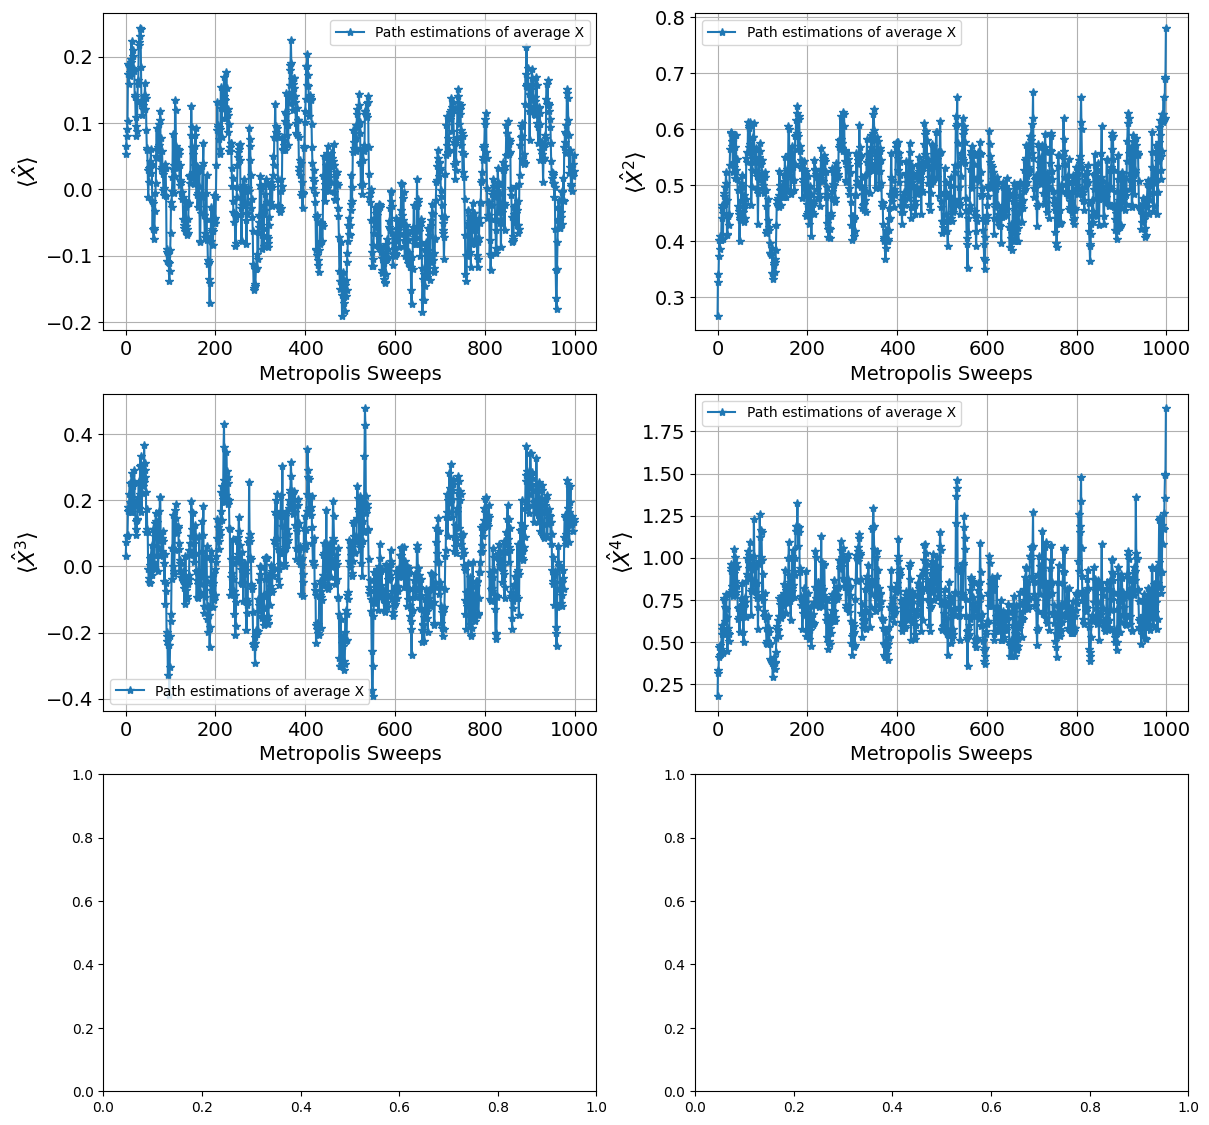

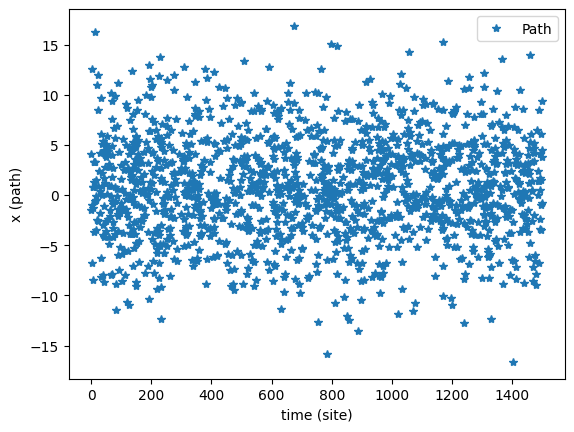

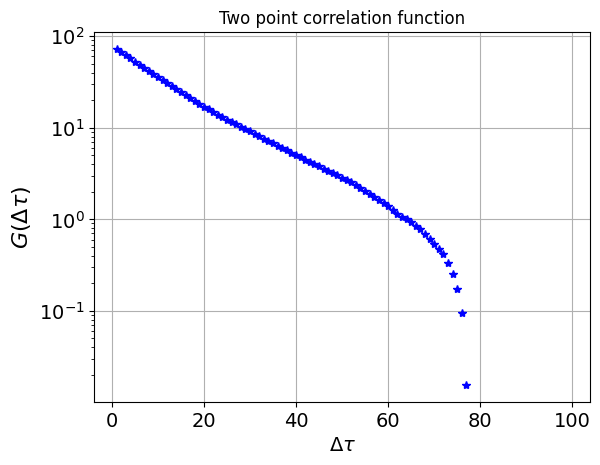

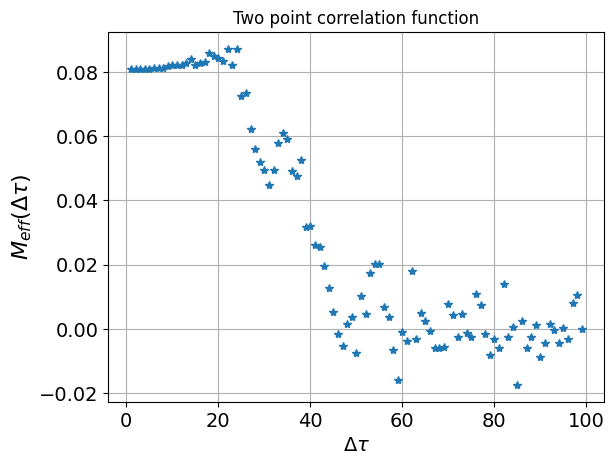

1500 0.08
[0.50217253 0.0118671  0.02441642 0.75226713] 66.92412904510446 9.281425044064314 0.08085880739240099 0.012378795723647371 [0.00042679 0.00127943 0.00145424 0.00122428 0.         0.
 0.         0.        ]
CPU times: user 34min 56s, sys: 3.99 s, total: 35min
Wall time: 35min 22s


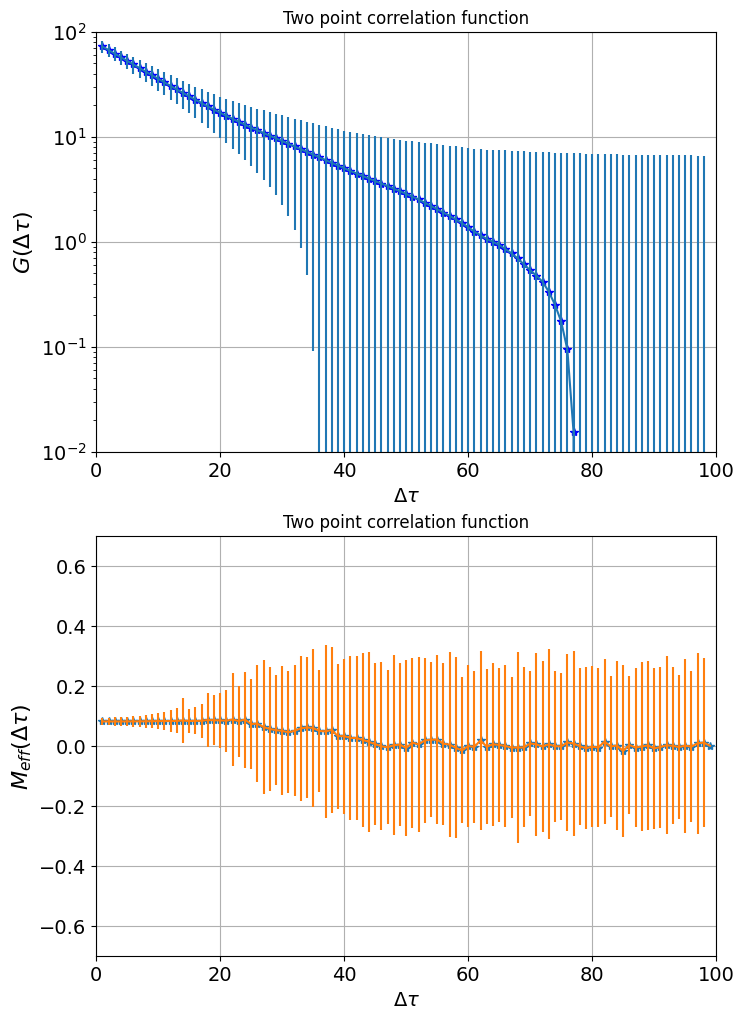

In [ ]:
# For the in series calculation

#Simulation parameters for MPI or Multiprocessing paralelization
LatticeSpacing=[0.08,0.1,0.5,0.8,1.]
Nt=[1500,1200,240,150,120]

Nsweeps=1000 #1000 or 10000
h=0.8 #free parameter accounting for acceptance rate

for i in range(0,1,1):
  dtt=LatticeSpacing[i] # Desired Lattice Spacing
  m=LatticeSpacing[i]
  w=LatticeSpacing[i]
  Nti=Nt[i]
  #print(MCInt(Regions[i],Regions[i+1],MaxN,DampedSinA,a,w,phi,gamma,c))
  fig, ax= plt.subplots(3,2, figsize=(14,14))
  %time EmcX1_120_1,EmcX2_120_1,EmcX3_120_1,EmcX4_120_1 = Main(dtt,m,w,Nti,Nsweeps,h)

In [ ]:
#Simulation parameters for MPI or Multiprocessing paralelization
LatticeSpacing=[0.08,0.1,0.5,0.8,1.]
Nt=[1500,1200,240,150,120]

Nsweeps=1000 #1000 or 10000
h=0.8 #free parameter accounting for acceptance rate

<ipython-input-94-df7bdb161871>:56: RuntimeWarning: invalid value encountered in log
  einv=(1/2)*np.log(correlation_function(path,(deltat-1))/correlation_function(path,(deltat+1)))
100%|██████████| 1000/1000 [35:18<00:00,  2.12s/it]


X**2 average 0.498574657374347
498.1604661373421 47.172045863780944 1000 100
498.1604661373421 50.85820274313213 1000 100
498.1604661373421 48.135799814201825 1000 100
498.1604661373421 53.62381214289526 1000 100
498.1604661373421 49.24487799856769 1000 100
498.1604661373421 52.35629892862021 1000 100
498.1604661373421 47.219125290679294 1000 100
498.1604661373421 50.974342192291466 1000 100
498.1604661373421 46.71862949473037 1000 100
X average 0.006794696679459288
6.941780656696466 -0.5898536144184425 1000 100
6.941780656696466 1.499409301983828 1000 100
6.941780656696466 0.2411349657614162 1000 100
6.941780656696466 0.7533667627452113 1000 100
6.941780656696466 2.2137200417316407 1000 100
6.941780656696466 3.9625246765026505 1000 100
6.941780656696466 -6.195956315757456 1000 100
6.941780656696466 6.60620487394396 1000 100
6.941780656696466 4.336111462530628 1000 100
X**3 average 12.4317773261912250.012263618532790406
 -2.2039990041830007 1000 100
12.431777326191225 4.020857219815427

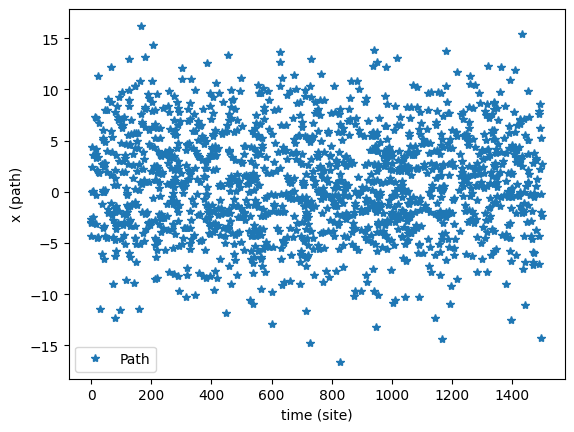

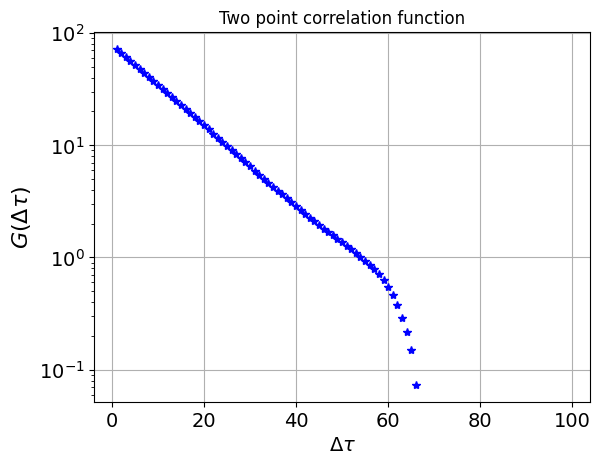

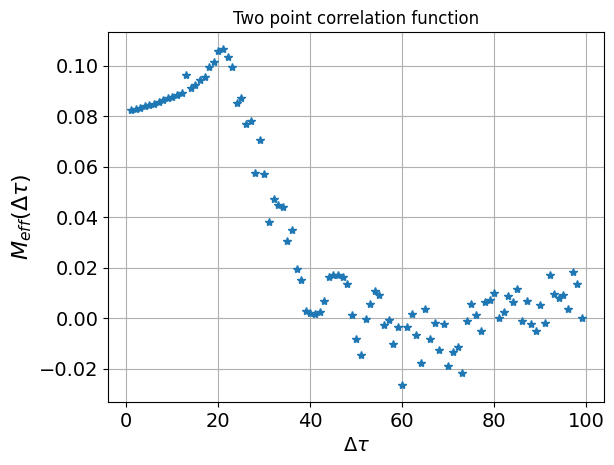

1500 0.08
[0.49857466 0.0067947  0.01226362 0.74781512] 66.33685843274175 11.269318787920307 0.08264614560011499 0.014196769479394867 [0.00078456 0.00117161 0.00185514 0.00273499 0.         0.
 0.         0.        ]


<ipython-input-94-df7bdb161871>:56: RuntimeWarning: invalid value encountered in log
  einv=(1/2)*np.log(correlation_function(path,(deltat-1))/correlation_function(path,(deltat+1)))
100%|██████████| 1000/1000 [28:27<00:00,  1.71s/it]


X**2 average 0.49830592384646766
497.81331701219034 48.177679542956284 1000 100
497.81331701219034 48.63521274075274 1000 100
497.81331701219034 49.98738992569704 1000 100
497.81331701219034 51.75503064283307 1000 100
497.81331701219034 50.3465140301161 1000 100
497.81331701219034 50.015701897492406 1000 100
497.81331701219034 49.22015440506707 1000 100
497.81331701219034 48.37720796352145 1000 100
497.81331701219034 49.021289259113246 1000 100
X average 0.014561754107894901
14.646754056636746 -2.985079435991227 1000 100
14.646754056636746 -2.8622890276861517 1000 100
14.646754056636746 3.8124393483116843 1000 100
14.646754056636746 5.505448162446807 1000 100
14.646754056636746 2.1741323907659207 1000 100
14.646754056636746 7.917543314729321 1000 100
14.646754056636746 -2.692567713515524 1000 100
14.646754056636746 0.5517840883827814 1000 100
14.646754056636746 -1.4636727774702076 1000 100
X**3 average 0.02735097476377485
27.549327605076616 -2.172609233585238 1000 100
27.54932760507661

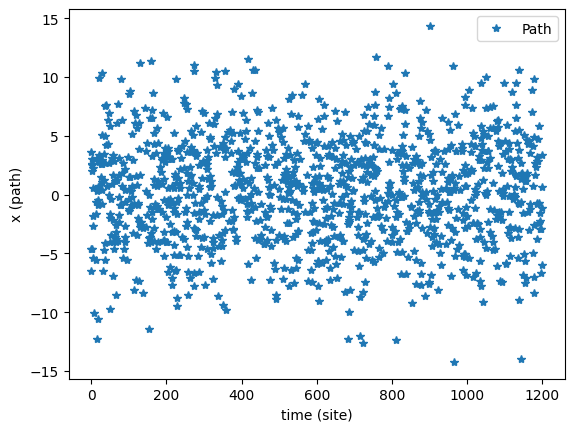

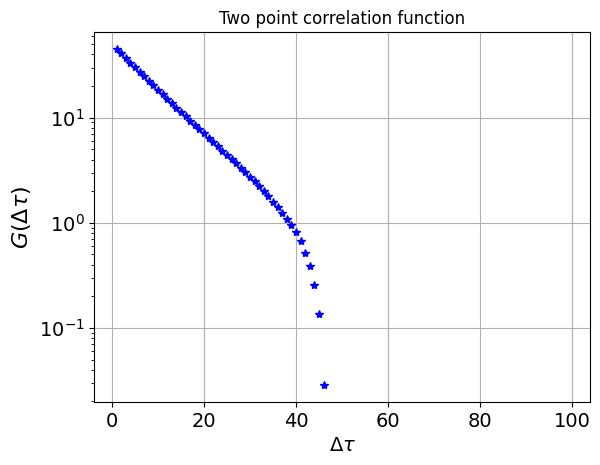

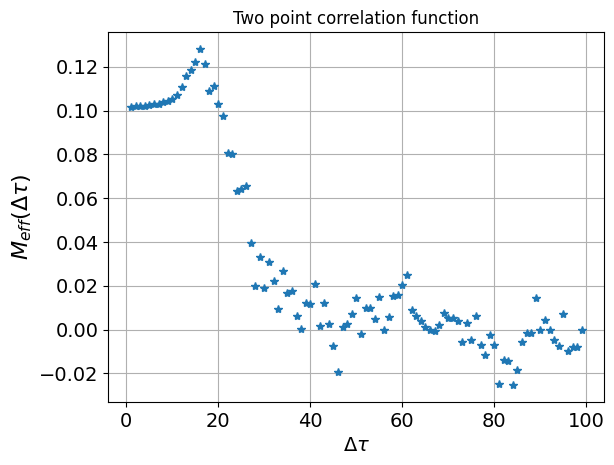

1200 0.1
[0.49830592 0.01456175 0.02735097 0.7431262 ] 40.79398201735379 6.003945240957919 0.10184422586685334 0.01557272951317074 [0.00036955 0.00126294 0.00193896 0.00100142 0.         0.
 0.         0.        ]


100%|██████████| 1000/1000 [06:01<00:00,  2.77it/s]


X**2 average 0.4863271994629223
485.76161684503984 48.07624874792292 1000 100
485.76161684503984 48.277837463927234 1000 100
485.76161684503984 47.81239040950204 1000 100
485.76161684503984 47.99697708992366 1000 100
485.76161684503984 48.6070902573538 1000 100
485.76161684503984 48.06547717777306 1000 100
485.76161684503984 48.06605459381054 1000 100
485.76161684503984 47.63430609042707 1000 100
485.76161684503984 49.04590127337438 1000 100
X average 0.003090282991918859
2.77736436505086 1.3265257588447166 1000 100
2.77736436505086 1.2450141259543288 1000 100
2.77736436505086 0.28874065938877763 1000 100
2.77736436505086 1.3668146259533434 1000 100
2.77736436505086 -0.5855830431786841 1000 100
2.77736436505086 1.091789399127998 1000 100
2.77736436505086 -0.8257437414300358 1000 100
2.77736436505086 0.5378975043127582 1000 100
2.77736436505086 -0.64609271701693 1000 100
X**3 average 0.006259697682319203
5.733440056910646 1.4874329200267924 1000 100
5.733440056910646  1.6164528161856064

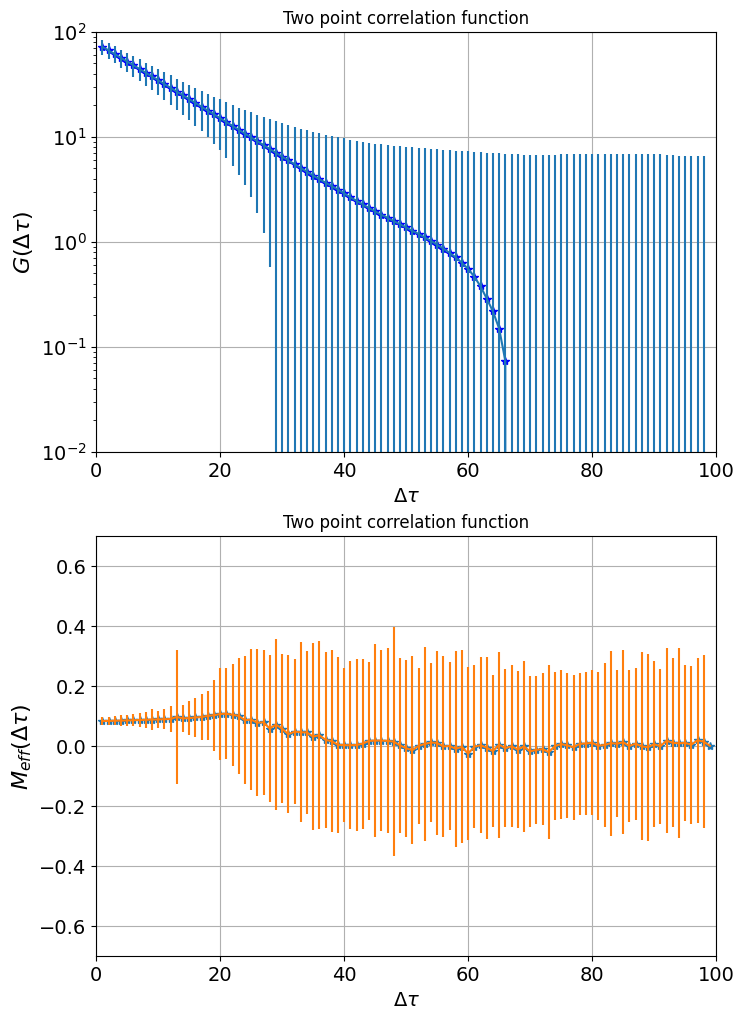

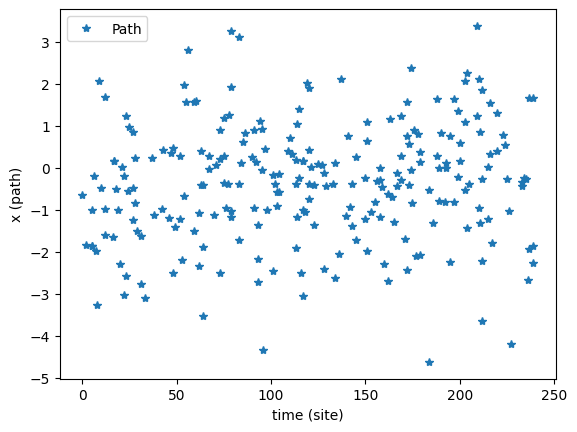

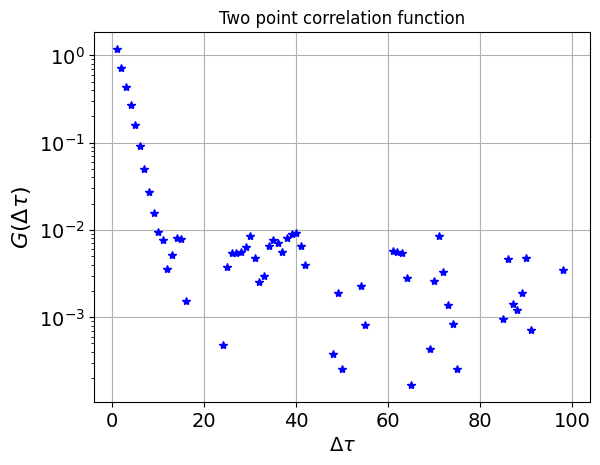

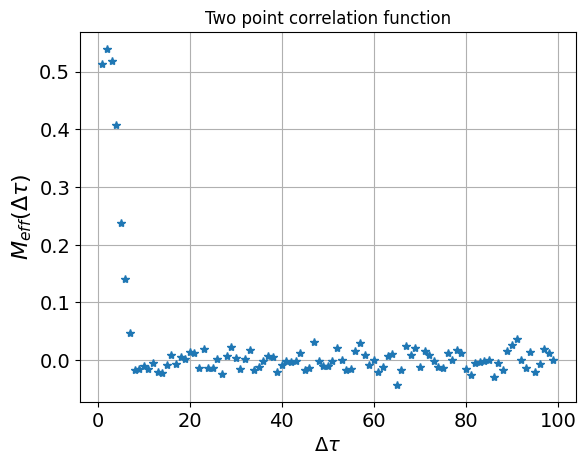

240 0.5
[0.4863272  0.00309028 0.0062597  0.7149196 ] 0.7232521924505135 0.2159744855754164 0.539561084607593 0.2205406664528323 [0.0001888  0.00028907 0.00044832 0.00052063 0.         0.
 0.         0.        ]


100%|██████████| 1000/1000 [03:57<00:00,  4.21it/s]


X**2 average 0.46809648640327967
467.6323765323443 47.26702653878561 1000 100
467.6323765323443 45.77361251177678 1000 100
467.6323765323443 47.1159926242635 1000 100
467.6323765323443 46.19458108950466 1000 100
467.6323765323443 45.700240510230955 1000 100
467.6323765323443 46.577998689590316 1000 100
467.6323765323443 46.11400787752016 1000 100
467.6323765323443 46.12446792452885 1000 100
467.6323765323443 45.75176518753744 1000 100
X average 0.0018288629751291232
1.8999400841249905 0.04741258733347037 1000 100
1.8999400841249905 -0.4912926777763181 1000 100
1.8999400841249905 -0.08237229663233916 1000 100
1.8999400841249905 2.1900865313576774 1000 100
1.8999400841249905 1.4271725981660168 1000 100
1.8999400841249905 0.29857936918220646 1000 100
1.8999400841249905 0.1199062087995243 1000 100
1.8999400841249905 -2.575371999314845 1000 100
1.8999400841249905 -0.17383133504274978 1000 100
X**3 average 0.00015602718206349486
0.2059813106387745 0.6652206848390464 1000 100
0.20598131063877

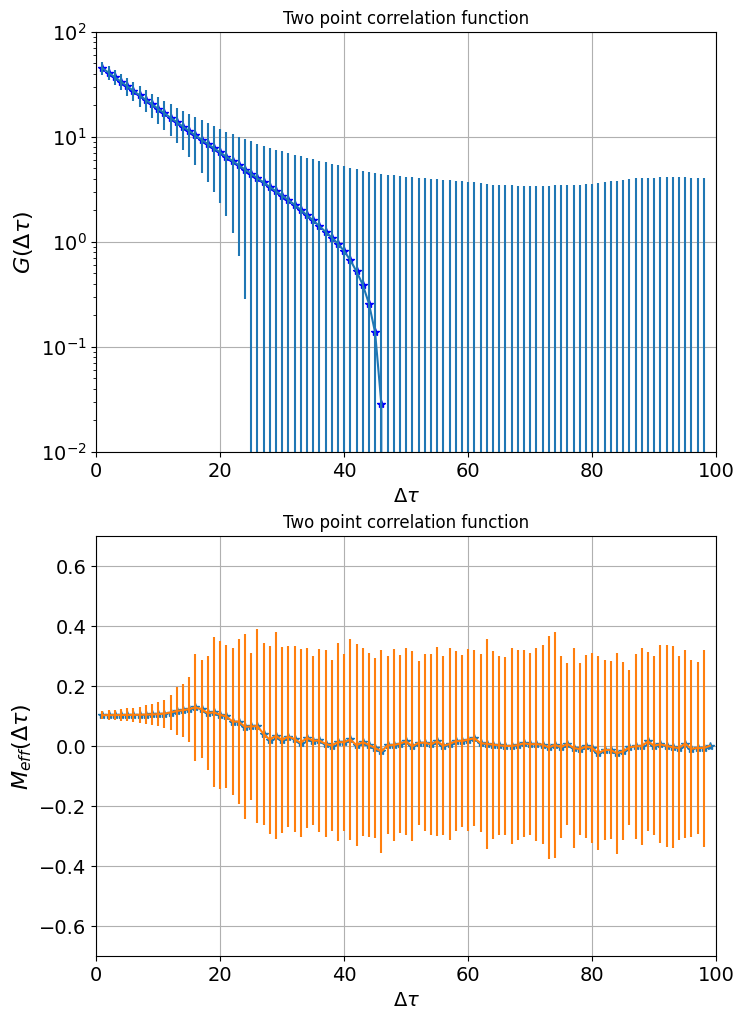

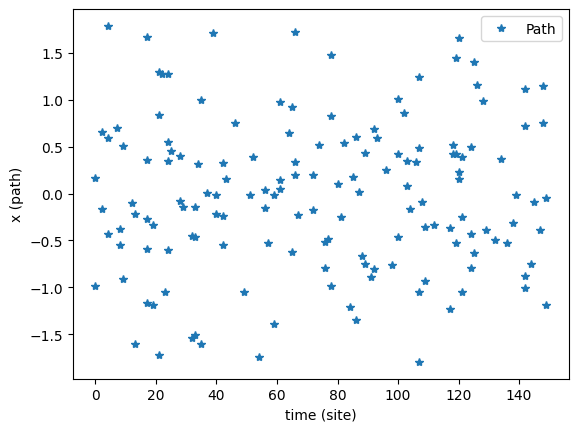

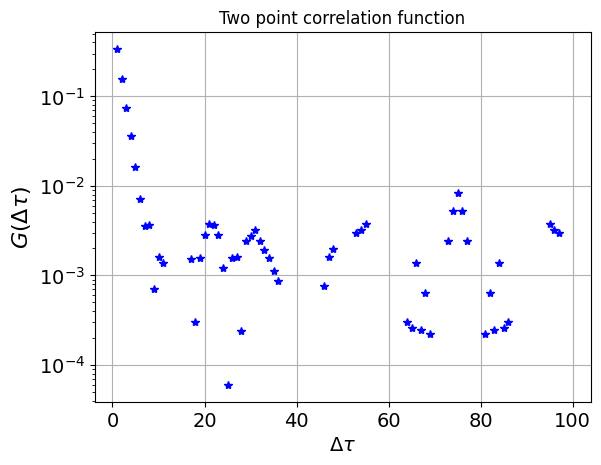

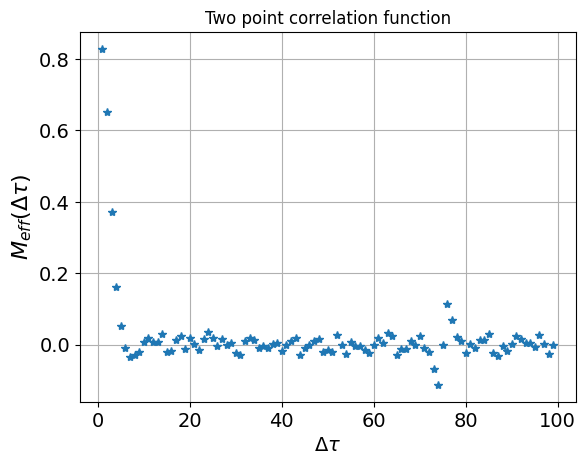

150 0.8
[4.68096486e-01 1.82886298e-03 1.56027182e-04 6.56246240e-01] 0.15539456967666743 0.08036196060557774 0.6519799768023985 0.4736623222861757 [0.00024083 0.00041404 0.00066362 0.00053459 0.         0.
 0.         0.        ]
CPU times: user 34.3 s, sys: 4.16 s, total: 38.4 s
Wall time: 1h 14min 11s


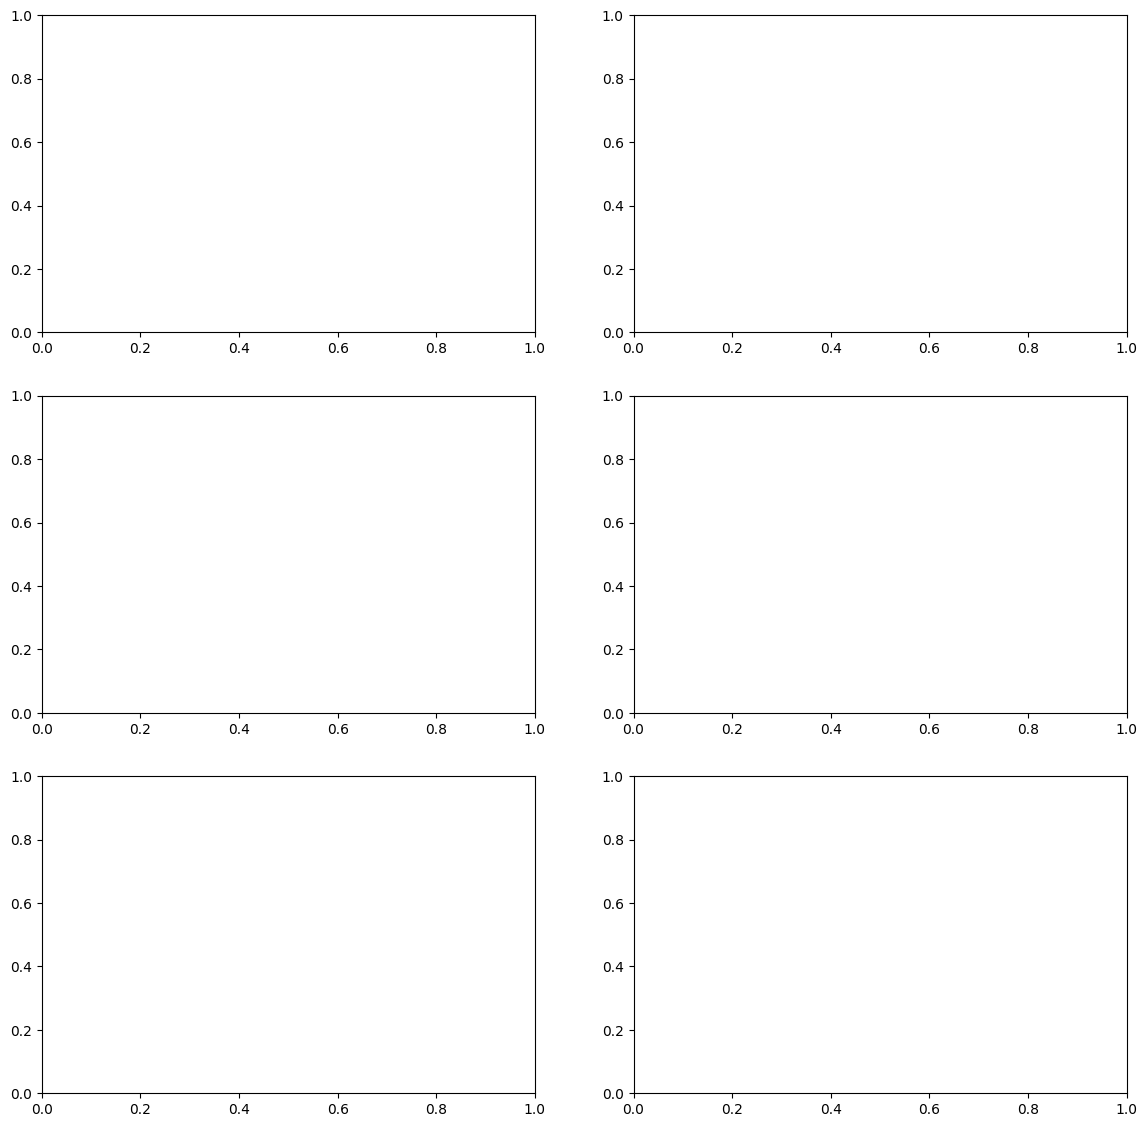

In [ ]:
pool = mp.Pool(mp.cpu_count())
fig, ax= plt.subplots(3,2, figsize=(14,14))
%time results = [pool.apply(Main, args=(LatticeSpacing[i],LatticeSpacing[i],LatticeSpacing[i],Nt[i],Nsweeps,h)) for i in range(len(LatticeSpacing)-1)]

In [ ]:
pool.close()
print(results)

[(array([ 0.02478565,  0.01168951,  0.02589944,  0.00560754,  0.00937185,
        0.00823506,  0.01412389,  0.00937451,  0.03533313,  0.01222684,
        0.0151422 ,  0.00044789, -0.00303014,  0.01925807,  0.03356878,
        0.01446225, -0.0186458 , -0.02095385, -0.06640718, -0.08303737,
       -0.08210627, -0.08504128, -0.0882169 , -0.09075086, -0.10140614,
       -0.11599061, -0.13644421, -0.14693122, -0.14279186, -0.10039768,
       -0.09732204, -0.09704218, -0.09791749, -0.0718558 , -0.05320761,
       -0.04860557, -0.04094619, -0.04537126, -0.05864938, -0.05656307,
       -0.04662465, -0.01623078,  0.00650263,  0.01108532,  0.042633  ,
        0.02683632,  0.00578061,  0.01370156,  0.007815  ,  0.00734321]), array([0.14532779, 0.18196676, 0.2108399 , 0.22011971, 0.25214716,
       0.27204313, 0.30207526, 0.33767512, 0.33870208, 0.34912732,
       0.36975967, 0.38876096, 0.3851174 , 0.37062243, 0.38211878,
       0.3882195 , 0.42559024, 0.45860439, 0.46187631, 0.44387575,
       0

#MPI

# Theoretical comparison with calculated $⟨x^{4}⟩$

In [ ]:
#elt=np.arange(0.01,1,0.001) #Effective lattice spacing
#Ntcons=np.arange(12000,120)
elt=np.linspace(0.01,10,1000) #Effective lattice spacing
Ntcons=np.linspace(12000,12,1000)
#print(Ntcons)
x2EV=np.zeros(len(elt))
x4EV=np.zeros(len(elt))

for i in range(0,len(elt),1):
  x2EV[i], x4EV[i]=ExpectValX24(Ntcons[i],elt[i],elt[i])
  #print(Ntcons[i],elt[i])


eltdis=[0.05,0.1,1]
x4EVdis=[0.49,0.75,0.6]

ax[2,0].plot(elt,x4EV,label="theoretical")
ax[2,0].plot(eltdis,x4EVdis,"o",label="Sim Average")
ax[2,0].set_xscale("log")
ax[2,0].set_xlabel("Effective lattice spacing")
ax[2,0].set_ylabel(r"$⟨X^{4}⟩$")
ax[2,0].set_ylim(0.55,0.8)
ax[2,0].set_xlim(10**-2,3)
ax[2,0].grid()
ax[2,0].legend()
fig.show()


eltdis=[0.05,0.1,1]
x2EVdis=[0.41,0.5,0.45]

ax[2,1].plot(elt,x2EV,label="theoretical")
ax[2,1].plot(eltdis,x2EVdis,"o",label="Sim Average")
ax[2,1].set_xscale("log")
ax[2,1].set_xlabel("Effective lattice spacing")
ax[2,1].set_ylabel(r"$⟨X^{2}⟩$")
#plt.ylim(0.55,0.8)
#plt.xlim(10**-2,3)
ax[2,1].grid()
ax[2,1].legend()
fig.show()
fig.savefig("1stgraph.eps")
fig.savefig("1stgraph")



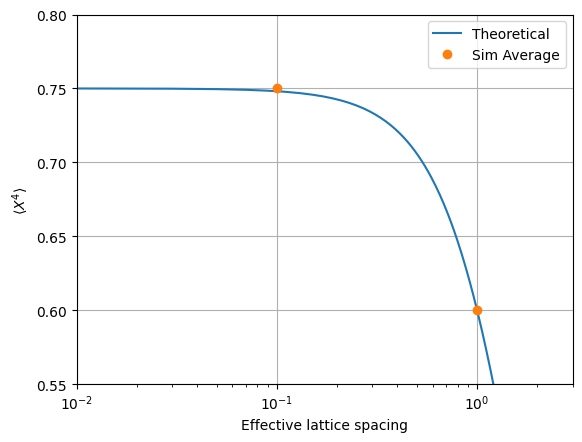

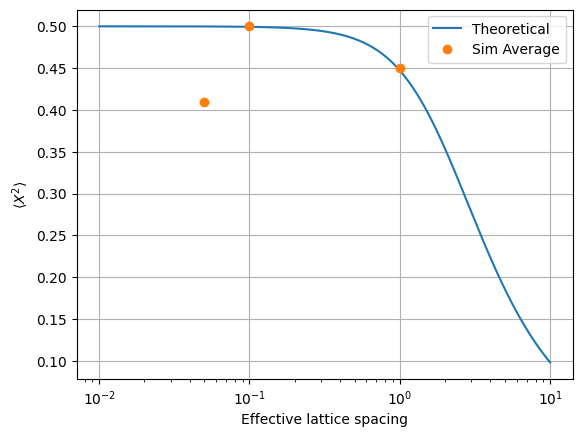

<Figure size 640x480 with 0 Axes>

In [ ]:
#elt=np.arange(0.01,1,0.001) #Effective lattice spacing
#Ntcons=np.arange(12000,120)
elt=np.linspace(0.01,10,1000) #Effective lattice spacing
Ntcons=np.linspace(12000,12,1000)
#print(Ntcons)
x2EV=np.zeros(len(elt))
x4EV=np.zeros(len(elt))

for i in range(0,len(elt),1):
  x2EV[i], x4EV[i]=ExpectValX24(Ntcons[i],elt[i],elt[i])
  #print(Ntcons[i],elt[i])

plt.figure(0)
eltdis=[0.05,0.1,1]
x4EVdis=[0.49,0.75,0.6]
plt.plot(elt,x4EV,label="Theoretical")
plt.plot(eltdis,x4EVdis,"o",label="Sim Average")
plt.xscale("log")
plt.xlabel("Effective lattice spacing")
plt.ylabel(r"$⟨X^{4}⟩$")
plt.ylim(0.55,0.8)
plt.xlim(10**-2,3)
plt.grid()
plt.legend()
plt.show()

plt.figure(1)
eltdis=[0.05,0.1,1]
x2EVdis=[0.41,0.5,0.45]
plt.plot(elt,x2EV,label="Theoretical")
plt.plot(eltdis,x2EVdis,"o",label="Sim Average")
#plt.errorbar(eltdis,x2EVdis, yerr=G2ej)
plt.xscale("log")
plt.xlabel("Effective lattice spacing")
plt.ylabel(r"$⟨X^{2}⟩$")
#plt.ylim(0.55,0.8)
#plt.xlim(10**-2,3)
plt.grid()
plt.legend()
plt.show()
plt.savefig("1stgraph.eps")
plt.savefig("1stgraph")


#Read the MPI calculations' data


In [5]:
import numpy as np
Nt=[120,150,240,400,1200,1500]
#elt=np.arange(0.01,1,0.001) #Effective lattice spacing
#Ntcons=np.arange(12000,120)
elt=np.linspace(0.01,10,1000) #Effective lattice spacing
Ntcons=np.linspace(12000,12,1000)
#print(Ntcons)

# Theoretical line
x2EV=np.zeros(len(elt))
x4EV=np.zeros(len(elt))
for i in range(0,len(elt),1):
  x2EV[i], x4EV[i]=ExpectValX24(Ntcons[i],elt[i],elt[i])

# Measured/simulations
x2EVsim=np.zeros(len(Nt))
x4EVsim=np.zeros(len(Nt))
x2err=np.zeros(len(Nt))
x4err=np.zeros(len(Nt))
AEMinv=np.zeros(len(Nt))
AEMinvsd=np.zeros(len(Nt))
for i in range(len(Nt)):
  print("Nt ",Nt[i])
  name="ObsfromMeasurements_" + str(Nt[i]) + ".npy"
  with open(name, 'rb') as f:

      o = np.load(f)
      g2 = np.load(f)[1]
      g2sd = np.load(f)[1]
      eminv = np.load(f)[1]
      eminvsd = np.load(f)[1]
      oJK = np.load(f)

      x2EVsim[i], x4EVsim[i]=o[0],o[3] #Mean
      x2err[i],x4err[i]=oJK[0],oJK[3] #Error

      AEMinv[i]=1/eminv #Mean
      AEMinvsd[i]=oJK[7] #Error


  print(o,g2,g2sd,eminv,eminvsd,oJK)

Nt  120
[ 0.44705709 -0.0021813  -0.00229529  0.59936853] 0.06421553577212613 0.048620594984002626 0.5781202953671536 0.5733885192834003 [3.10020243e-04 2.28630905e-04 3.72691330e-04 6.45066894e-04
 0.00000000e+00 3.66404365e-05 0.00000000e+00 1.38450400e-02]
Nt  150
[0.46305747 0.00101401 0.00193302 0.64125113] 0.1513748519401361 0.0791881878050129 0.6712722657202012 0.5196320111673753 [0.00032271 0.00025312 0.00041786 0.00072185 0.         0.0001012
 0.         0.00274133]
Nt  240
[0.48618737 0.00163875 0.00219752 0.70760046] 0.7217378184261203 0.21831336363536608 0.5456249361704217 0.23252803325362198 [0.00033056 0.0002782  0.00045707 0.00070652 0.         0.00019478
 0.         0.00226481]
Nt  400
[ 0.49410035 -0.00090346 -0.00103595  0.73262215] 3.0158266622276617 0.6710577783782526 0.31263337794135815 0.07381235259867457 [0.0003475  0.00036176 0.000566   0.0007598  0.         0.00077135
 0.         0.00289734]
Nt  1200
[0.50111421 0.00277631 0.00492467 0.75334482] 41.064589686438

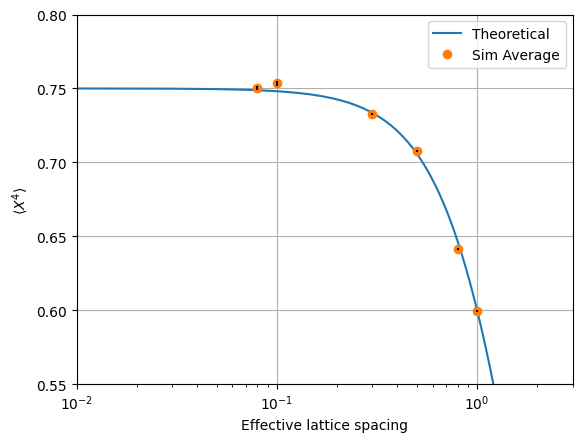

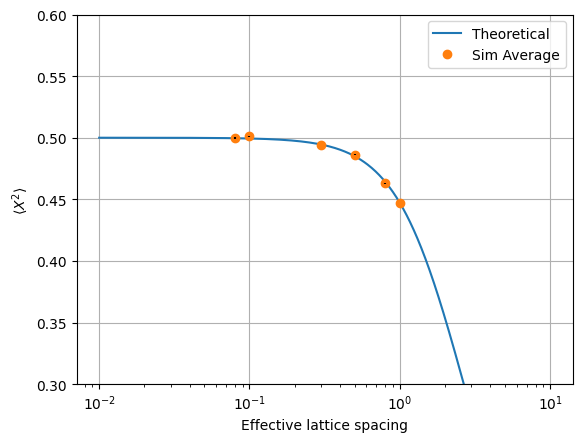

In [14]:
eltsim=[1.,0.8,0.5,0.3,0.1,0.08]

plt.figure(2)
plt.plot(elt,x4EV,label="Theoretical")
plt.plot(eltsim,x4EVsim,"o",label="Sim Average")
plt.errorbar(eltsim,x4EVsim, yerr=x4err,color="k",fmt="none",barsabove=True)
plt.xscale("log")
plt.xlabel("Effective lattice spacing")
plt.ylabel(r"$⟨X^{4}⟩$")
plt.ylim(0.55,0.8)
plt.xlim(10**-2,3)
plt.grid()
plt.legend()
plt.savefig("x4graph.eps")
plt.savefig("x4graph")
plt.show()

plt.figure(1)
plt.plot(elt,x2EV,label="Theoretical")
plt.plot(eltsim,x2EVsim,"o",label="Sim Average")
plt.errorbar(eltsim,x2EVsim, yerr=x2err,color="k",fmt="none",barsabove=True)
plt.xscale("log")
plt.xlabel("Effective lattice spacing")
plt.ylabel(r"$⟨X^{2}⟩$")
plt.ylim(0.3,0.6)
#plt.xlim(10**-2,3)
plt.grid()
plt.legend()
plt.savefig("x2graph.eps")
plt.savefig("x2graph")
plt.show()



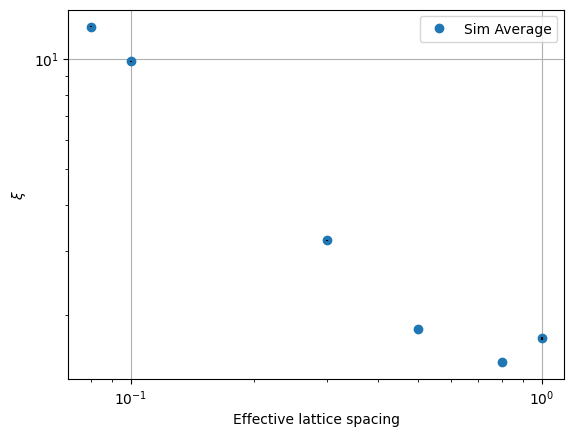

In [15]:
eltsim=[1.,0.8,0.5,0.3,0.1,0.08]

plt.figure(0)
#plt.plot(elt,x4EV,label="Theoretical")
plt.plot(eltsim,AEMinv,"o",label="Sim Average")
plt.errorbar(eltsim,AEMinv, yerr=AEMinvsd,color="k",fmt="none")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Effective lattice spacing")
plt.ylabel(r"$\xi$")
#plt.ylim(0.55,0.8)
#plt.xlim(10**-2,3)
plt.grid()
plt.legend()

plt.savefig("corlengraph.eps")
plt.savefig("corlengraph")
plt.show()